In [20]:
import os
from pathlib import Path
from datetime import datetime
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

from dataset.pretrain_datasets import tile_image
from build_dataset import get_files_from_folder, extract_dates_pattern_airmass_rgb_20200101_0000


In [ ]:

def draw_tiles_and_center(
    pil_image: Image.Image,
    tile_size=(224, 224),
    stride=(224, 224),
    cyclone_center=None,
    box_color=(0, 255, 0),
    point_color=(255, 0, 0),
    point_radius=4
):
    """
    Disegna, sull'immagine `pil_image`, una serie di riquadri (224×224 di default)
    generati con stride specificato, in modo identico alla suddivisione in tile.

    Se `cyclone_center` è una tupla (cx, cy), disegna un punto rosso in tale posizione.

    Ritorna l'immagine PIL con i disegni sopra.
    """

    # Creiamo una copia su cui disegnare
    out_img = pil_image.copy()
    draw = ImageDraw.Draw(out_img)

    width, height = pil_image.size
    tile_w, tile_h = tile_size
    stride_x, stride_y = stride

    # Disegniamo tutti i riquadri
    for y_off in range(0, height - tile_h + 1, stride_y):
        for x_off in range(0, width - tile_w + 1, stride_x):
            # c'è un box in (x_off, y_off) -> (x_off+tile_w, y_off+tile_h)
            top_left = (x_off, y_off)
            bottom_right = (x_off + tile_w, y_off + tile_h)
            draw.rectangle([top_left, bottom_right], outline=box_color, width=2)

    # Se c'è un centro da disegnare
    if cyclone_center is not None:
        cx, cy = cyclone_center
        # Disegniamo un piccolo cerchio intorno al centro
        draw.ellipse(
            [
                (cx - point_radius, cy - point_radius),
                (cx + point_radius, cy + point_radius)
            ],
            fill=point_color
        )

    return out_img


In [10]:
input_dir = "../fromgcloud"
#output_dir = "../airmassRGB/supervised" 
#os.makedirs(output_dir, exist_ok=True)

filenames = get_files_from_folder(folder=input_dir, extension="png")
#print(f"Trovati {len(filenames)} files")

file_metadata = []
for fname in filenames:
    start_dt = extract_dates_pattern_airmass_rgb_20200101_0000(fname.name)
    file_metadata.append((fname, start_dt))

sorted_files = sorted(file_metadata, key=lambda x: x[1])  # Ordina per start_dt
#random_fnames =  [item[0] for item in file_metadata]
sorted_filenames = [item[0] for item in sorted_files]
print(f" Ci sono {len(sorted_filenames)} files.")

 Ci sono 117764 files.


In [14]:
fsel = [f for f in file_metadata if f[1] == datetime(2020, 9, 17, 3, 40)]

In [15]:
fsel

[(PosixPath('../fromgcloud/airmass_rgb_20200917_0340.png'),
  datetime.datetime(2020, 9, 17, 3, 40))]

In [16]:
img = Image.open(fsel[0][0])

In [18]:
center_px = (500, 300)

# Disegniamo
out_img = draw_tiles_and_center(
    pil_image=img,
    cyclone_center=center_px
)

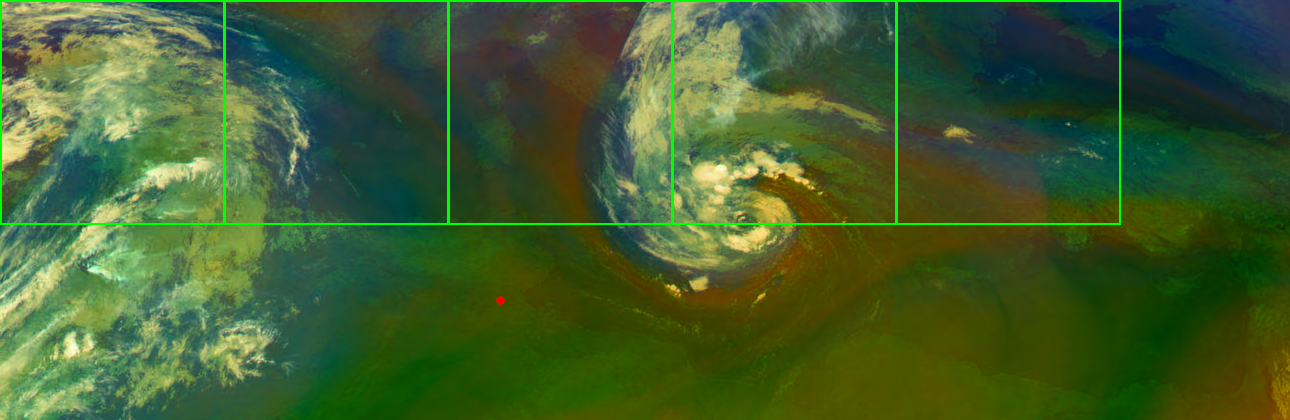

In [26]:
display(out_img)